In [14]:
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
from pandas import *



In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
def speed(y, x):
    vel = []
    for i in range(0,len(y)):
        if i ==0:
            vel.append((y[i+1]-y[i])/(x[i+1]-x[i]))
        elif i== len(y)-1:
            vel.append((y[i]-y[i-1])/(x[i]-x[i-1]))
        else:
            vel.append((y[i+1]-y[i-1])/ (x[i+1]-x[i-1]))       

    return vel


In [17]:
def acceleration(y,x):
    acc = []
    for i in range(0, len(y)):
        if i==0:
            acc.append((y[i+1]+y[i]-2*y[i+1])/(2*((x[i+1]-x[i])**2)))
        elif i==len(y)-1:
            acc.append((y[i]+y[i-2]-2*y[i-1])/(2*((x[i]-x[i-1])**2)))
        else:
            temp = (y[i+1]+y[i-1]-2*y[i])/((x[i+1]-x[i])**2)
            acc.append(temp)
    return acc

In [18]:
def getTime(lst):
    initime = 7*3600
    ls = []
    for i in range(0,len(lst)):
        temp = str(lst[i])
        currTime = int(temp[0:1])*3600 + int(temp[1:3])*60+ int(temp[3:5]) + int(temp[5:])*0.001
        ls.append(currTime-initime)
    return ls


In [19]:
colnames = ["A","B","C","D","E","F","G","H","I","J"]
ds = read_csv('/content/drive/MyDrive/L001_F001_ALL/L001_F001_TRAJECTORY/L001_F001_trajectory.csv',names=colnames, header=None)

vehicle_id = ds["A"].tolist()
time = getTime(ds["B"].tolist())
type = ds["C"].tolist()
vel = ds["D"].tolist()
lane = ds["E"].tolist()
lat = ds["F"].tolist()
long = ds["G"].tolist()
dist = ds["H"].tolist()
vehicle_len = ds['I'].tolist()
flag = ds['J'].tolist()

dict = {1:[],2:[],3:[],4:[],5:[]}
newDict = {1:[],2:[],3:[],4:[],5:[]}
fnDict = {1:[[],[],[],[],[]],2:[[],[],[],[],[]],3:[[],[],[],[],[]],4:[[],[],[],[],[]],5:[[],[],[],[],[]]}

In [20]:
for i in range(0,len(time)):
    if 565<time[i]<585:
        temp = np.random.randint(0,2)
        if temp%2==0 and len(dict[1])<5 and vehicle_id[i] not in newDict[1]:
            dict[1].append(i)
            newDict[1].append(vehicle_id[i])

    if 1040<time[i]<1060:
        temp = np.random.randint(0,2)
        if temp%2==0 and len(dict[2])<5 and vehicle_id[i] not in newDict[2]:
            dict[2].append(i)
            newDict[2].append(vehicle_id[i])

    if 1840<time[i]<1860:
        temp = np.random.randint(0,2)
        if temp%2==0 and len(dict[3])<5 and vehicle_id[i] not in newDict[3]:
            dict[3].append(i)
            newDict[3].append(vehicle_id[i])

    if 2470<time[i]<2490:
        temp = np.random.randint(0,2)
        if temp%2==0 and len(dict[4])<5 and vehicle_id[i] not in newDict[4]:
            dict[4].append(i)
            newDict[4].append(vehicle_id[i])

    if 3490<time[i]<3510:
        temp = np.random.randint(0,2)
        if temp%2==0 and len(dict[5])<5 and vehicle_id[i] not in newDict[5]:
            dict[5].append(i)
            newDict[5].append(vehicle_id[i])                        


In [25]:
plot_decider = int(input("What graph do you need? \n1. Trajecory plots\n2. Speed vs Time plots\n3. Acceleration vs Time\n"))

What graph do you need? 
1. Trajecory plots
2. Speed vs Time plots
3. Acceleration vs Time
2


ZeroDivisionError: ignored

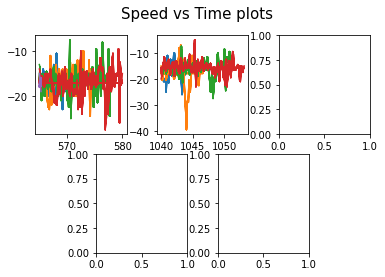

In [27]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 6)
gs.update(wspace = 1)
ax=[]
ax.append(plt.subplot(gs[0, :2], ))
ax.append(plt.subplot(gs[0, 2:4]))
ax.append(plt.subplot(gs[0, 4:]))
ax.append(plt.subplot(gs[1, 1:3]))
ax.append(plt.subplot(gs[1, 3:5]))
if plot_decider==1:
    fig.suptitle("Trajectory plots", fontsize=15)
if plot_decider==2:
    fig.suptitle("Speed vs Time plots", fontsize=15)
if plot_decider==3:
    fig.suptitle("Acceleration vs Time plots", fontsize=15)
ls= [565,1040,1790,2470,3490]
for k in range(1,6):
    for i in range(min(dict[k]),max(dict[k])+1):
        if vehicle_id[i] in newDict[k] and ls[k-1]<=time[i]<=ls[k-1]+20:
            index = newDict[k].index(vehicle_id[i])
            # print(index)
            fnDict[k][index].append(i)

    for i in range(0,5):
        x= []
        y =[]
        vel = []
        for j in fnDict[k][i]:
            x.append(time[j])
            y.append(dist[j])
        # plt.plot(x,y)
        if plot_decider==1:
            t = y
        elif plot_decider==2:
            vel = speed(y,x)
            t = vel
        elif plot_decider==3:    
            acc = acceleration(y,x)
            t = acc
        else:
            print("Invalid Input")
        ax[k-1].plot(x,t)
    
plt.show()    
